# Dicoding Submission Belajar Mahcine Learning Untuk Pemula
## Nama : Winarto 

In [ ]:
# import Dependencies
import zipfile, os
from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

%matplotlib inline

In [ ]:
# prepare data  
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-12 04:13:52--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.47MB/s    in 68s     

2021-05-12 04:15:00 (4.54 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# extract file
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Agumentasi gambar menggunakan ImageDataGenerator dengan ukuran validation set 0.4 atau 40% dari keseluruhan data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   fill_mode='wrap',
                                   validation_split=0.4
                                   )

In [ ]:
# Menghasilkan kumpulan data dari hasil augmentasi gambar menggunakan method flow_from_directory

train_generator = train_datagen.flow_from_directory(
    '/tmp/rockpaperscissors/rps-cv-images', # menentukan target path
    target_size=(150, 150), 
    batch_size=32,
    shuffle=True, 
    class_mode='categorical', # karena data klasifikasinya lebih dari 2 maka menggunakan class_mode = 'categorical'
    # memberikan parameter subset karena pada saat augmentasi gambar kita juga sudah mengaktifkan validation_split
    subset='training', 
)

validation_generator = train_datagen.flow_from_directory(
    '/tmp/rockpaperscissors/rps-cv-images',
    target_size=(150, 150),
    batch_size=32,
    shuffle=True, 
    class_mode='categorical',
    subset='validation' 
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
# Membuat model menggunakan mode Sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# Panggil fungsi compile 
model.compile(loss='categorical_crossentropy', # 'categiorical_crossentropy' dipilih karena klasifikasinya lebih dari 2
              optimizer=tf.optimizers.Adam(), 
              metrics=['accuracy'])

In [ ]:
# Latih Model
model.fit(train_generator,
          steps_per_epoch=25,
          epochs=20,
          validation_data = validation_generator,
          validation_steps=5,
          verbose=2)

Epoch 1/20
25/25 - 39s - loss: 1.1092 - accuracy: 0.3762 - val_loss: 1.0050 - val_accuracy: 0.6313
Epoch 2/20
25/25 - 35s - loss: 0.7095 - accuracy: 0.7182 - val_loss: 0.4526 - val_accuracy: 0.8125
Epoch 3/20
25/25 - 35s - loss: 0.3280 - accuracy: 0.8792 - val_loss: 0.3526 - val_accuracy: 0.9062
Epoch 4/20
25/25 - 35s - loss: 0.2383 - accuracy: 0.9130 - val_loss: 0.2802 - val_accuracy: 0.9062
Epoch 5/20
25/25 - 35s - loss: 0.2389 - accuracy: 0.9156 - val_loss: 0.2313 - val_accuracy: 0.9375
Epoch 6/20
25/25 - 37s - loss: 0.1958 - accuracy: 0.9287 - val_loss: 0.1244 - val_accuracy: 0.9500
Epoch 7/20
25/25 - 36s - loss: 0.1837 - accuracy: 0.9455 - val_loss: 0.3131 - val_accuracy: 0.9000
Epoch 8/20
25/25 - 40s - loss: 0.1564 - accuracy: 0.9545 - val_loss: 0.1391 - val_accuracy: 0.9563
Epoch 9/20
25/25 - 38s - loss: 0.1269 - accuracy: 0.9513 - val_loss: 0.2196 - val_accuracy: 0.9375
Epoch 10/20
25/25 - 37s - loss: 0.1396 - accuracy: 0.9550 - val_loss: 0.2256 - val_accuracy: 0.8875
Epoch 11/

In [ ]:
# Evaluasi Model Loss dan Accuracy
model_score = model.evaluate(validation_generator, steps=20)
print('Loss : ', model_score[0])
print('Accuracy : ', model_score[1])

20/20 [==============================] - 10s 515ms/step - loss: 0.0809 - accuracy: 0.9781
Loss :  0.08087044954299927
Accuracy :  0.9781249761581421


Saving 1fKclJk4eBWOQSR1.png to 1fKclJk4eBWOQSR1.png
1fKclJk4eBWOQSR1.png
[[1. 0. 0.]]
Kertas


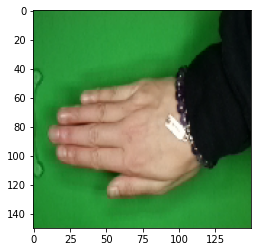

In [ ]:
# Fungsi PredictImage
def predictImage(upload_image):
  for fn in upload_image.keys():

    path = fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
  
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    
    print(fn)
    print(classes)
    if classes[0][0] == 1:
      print('Kertas')
    elif classes[0][1] == 1:
      print('Batu')
    elif classes[0][2] == 1:
      print('Gunting')
    else:
      print('Tidak Tahu')

# Panggil method Upload
uploaded = files.upload()

# Panggil Method PredictImage
predictImage(uploaded)

